In [1]:
%tensorflow_version 2.x
# pandas 參考：https://leemeng.tw/practical-pandas-tutorial-for-aspiring-data-scientists.html

In [2]:
from tensorflow.keras.datasets.fashion_mnist import load_data
mnist = load_data()
mnist

4423680/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

|標籤	| 種類|
|:--- | :---: |
|0	|短袖圓領T恤|
|1	|褲子 |
|2  |套衫|
|3	|連衣裙|
|4	|外套|
|5	|涼鞋|
|6	|襯衫|
|7	|運動鞋|
|8	|包|
|9	|短靴|



In [3]:
# 一定要了解資料有多少筆跟資料型態
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape) # 60000筆資料, 每筆 28 x 28
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
ans = load_data()[0][1]
# 第一種方法找到 list 裡面不重複的資料
ans = set(ans)
ans
# 第二種方法找到 list 裡面不重複資料
#ans = {}.fromkeys(ans).keys()
#print(sorted(ans))
# 總共分為10類, 由0~9

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [5]:
classname = ["t-shirt", "pants", "pullover", "dress", "jacket", "sandels", "shirts", "snakers", "packs", "boots"]

這個是: packs ,為第 8 類


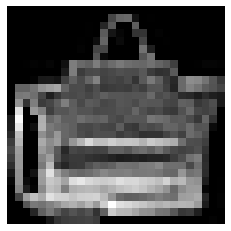

In [6]:
# 查看圖片
import matplotlib.pyplot as plt
import random
p = random.randint(0, 59999)
plt.axis("off")
plt.imshow(x_train[p], cmap="gray")
n = y_train[p]
print("這個是:", classname[n], ",為第", y_train[p], "類")

In [7]:
# 訓練資料處理成 1D 向量
x_train_norm = x_train.reshape(60000, 784) / 255
x_test_norm = x_test.reshape(10000, 784) / 255
x_train_norm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
# 答案處理成 one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_norm = to_categorical(y_train)
y_test_norm = to_categorical(y_test)
y_train_norm

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=784))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
              optimizer="adam", metrics=["accuracy"])

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callback = [EarlyStopping(patience=3, restore_best_weights=True),
            ModelCheckpoint("Fashionmnist.h5", save_best_only=True)]
history = model.fit(x_train_norm, y_train_norm,
          batch_size=300, epochs=14,
          validation_split=0.1,
          callbacks=callback)

Epoch 1/14
180/180 [==============================] - 1s 7ms/step - loss: 0.6428 - accuracy: 0.7801 - val_loss: 0.4392 - val_accuracy: 0.8477
Epoch 2/14
180/180 [==============================] - 1s 6ms/step - loss: 0.4164 - accuracy: 0.8544 - val_loss: 0.4271 - val_accuracy: 0.8433
Epoch 3/14
180/180 [==============================] - 1s 6ms/step - loss: 0.3705 - accuracy: 0.8671 - val_loss: 0.3815 - val_accuracy: 0.8620
Epoch 4/14
180/180 [==============================] - 1s 6ms/step - loss: 0.3446 - accuracy: 0.8764 - val_loss: 0.3609 - val_accuracy: 0.8652
Epoch 5/14
180/180 [==============================] - 1s 6ms/step - loss: 0.3251 - accuracy: 0.8826 - val_loss: 0.3474 - val_accuracy: 0.8715
Epoch 6/14
180/180 [==============================] - 1s 6ms/step - loss: 0.3089 - accuracy: 0.8881 - val_loss: 0.3329 - val_accuracy: 0.8787
Epoch 7/14
180/180 [==============================] - 1s 6ms/step - loss: 0.2965 - accuracy: 0.8908 - val_loss: 0.3282 - val_accuracy: 0.8812
Epoch 

In [13]:
# 評估模型, 給沒看過的資料評估 loss, accuracy
model.evaluate(x_test_norm, y_test_norm)

313/313 [==============================] - 0s 1ms/step - loss: 0.3476 - accuracy: 0.8773


[0.34757867455482483, 0.8773000240325928]

In [14]:
# 預測
pre = model.predict_classes(x_test_norm)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Text(0, 0.5, 'accuracy')

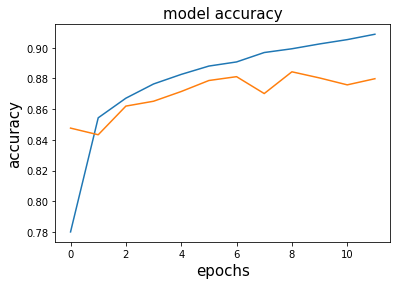

In [12]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy", fontsize=15)
plt.xlabel("epochs", fontsize=15)
plt.ylabel("accuracy", fontsize=15)

In [15]:
import pandas as pd
from sklearn.metrics import confusion_matrix
p = ["預測  {}".format(i) for i in classname]
t = ["真實  {}".format(i) for i in classname]
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat, columns=p, index=t)

,預測 t-shirt,預測 pants,預測 pullover,預測 dress,預測 jacket,預測 sandels,預測 shirts,預測 snakers,預測 packs,預測 boots
真實 t-shirt,821,1,20,25,2,3,118,0,10,0
真實 pants,2,968,1,22,3,0,4,0,0,0
真實 pullover,13,1,817,13,82,0,74,0,0,0
真實 dress,23,9,16,890,33,1,24,0,4,0
真實 jacket,0,1,117,31,776,0,74,0,1,0
真實 sandels,0,0,0,1,0,967,0,10,1,21
真實 shirts,119,2,89,30,59,0,689,0,12,0
真實 snakers,0,0,0,0,0,39,0,900,0,61
真實 packs,6,0,7,3,4,4,2,4,970,0
真實 boots,0,0,0,0,0,5,1,19,0,975


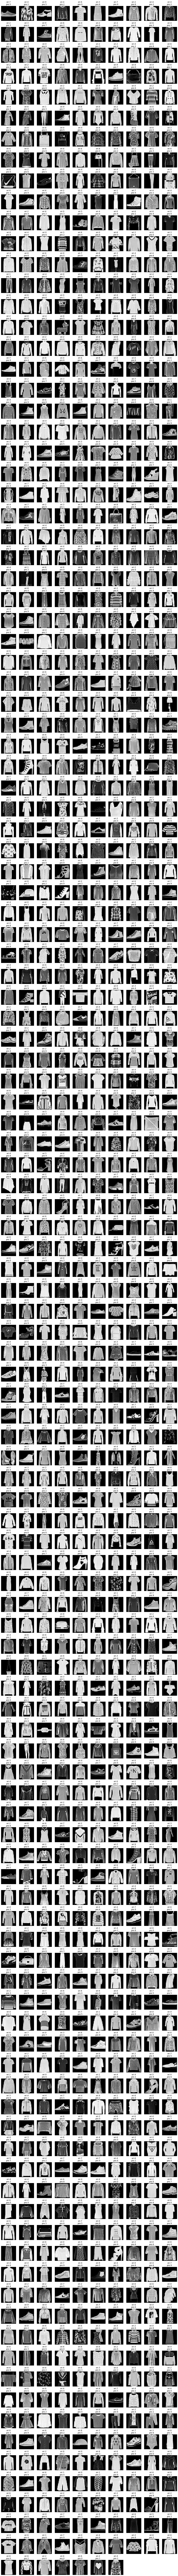

In [16]:
import numpy as np
idx = np.nonzero(pre != y_test)[0]
false_img = x_test[idx]
false_pre = pre[idx]
false_ans = y_test[idx]
# 高度 寬度設定
plt.figure(figsize=(20, 300))
width = 10
height = len(false_img) // width+1
for i, img in enumerate(false_img):
  plt.subplot(height, width, i+1)
  plt.axis("off")
  t = "ori:{}\npre:{}".format(false_ans[i], 
                              false_pre[i])
  plt.title(t)
  plt.imshow(img, cmap="gray")